In [1]:
import glob
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import rioxarray as rix

Get bounding box

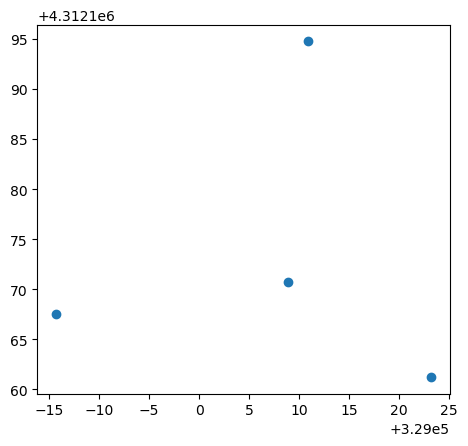

In [2]:
towers_gdf = gpd.read_file("../landsat_data/towers.geojson").to_crs("EPSG:32613")
towers_gdf.plot()
central_point = towers_gdf.set_index('Tower').loc['c'].geometry
from shapely.geometry import box
x, y = central_point.x, central_point.y
bounding_box = gpd.GeoDataFrame(
    geometry = [box(x - 150, y - 150, x + 150, y + 150)],
)

Crop all images to the bounds. Save clipped images locally.

In [3]:
ps_image_filepaths = [
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2020_psscene_analytic_sr_udm2/2020-05-02_strip_3365031_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2021_psscene_analytic_sr_udm2/2021-04-29_strip_4427235_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2022_psscene_analytic_sr_udm2/2022-05-06_strip_5620141_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-16_strip_6512704_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2024_psscene_analytic_sr_udm2/2024-05-02_strip_7279988_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2025_psscene_analytic_sr_udm2/2025-04-25_strip_8025643_composite_file_format.tif",

    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-09_strip_6495899_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-10_strip_6497912_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-13_strip_6505736_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-15_strip_6510381_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-16_strip_6512704_composite_file_format.tif",
    "/Users/elischwat/Development/data/sublimationofsnow/planet_imagery/gothic-co-meltout-2023_psscene_analytic_sr_udm2/2023-05-23_strip_6528815_composite_file_format.tif",
]


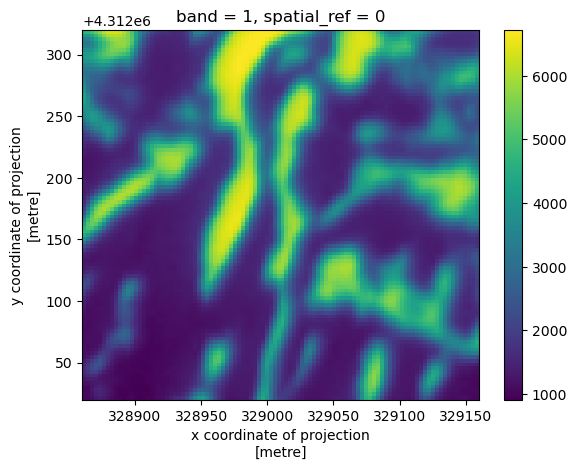

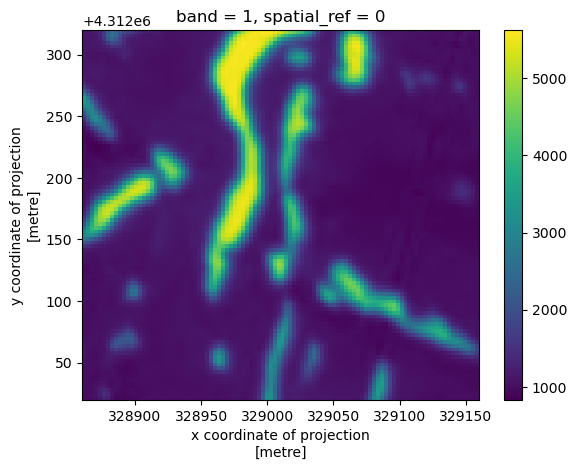

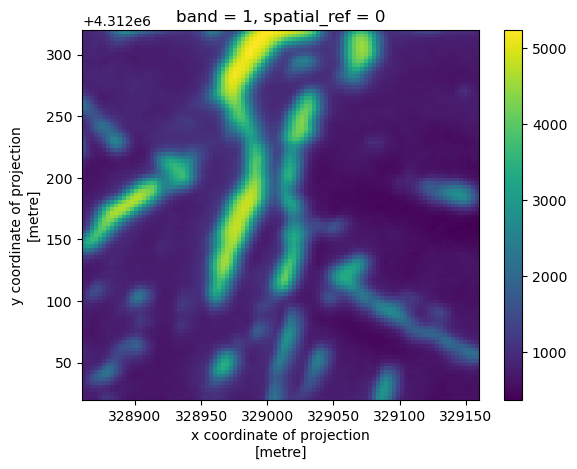

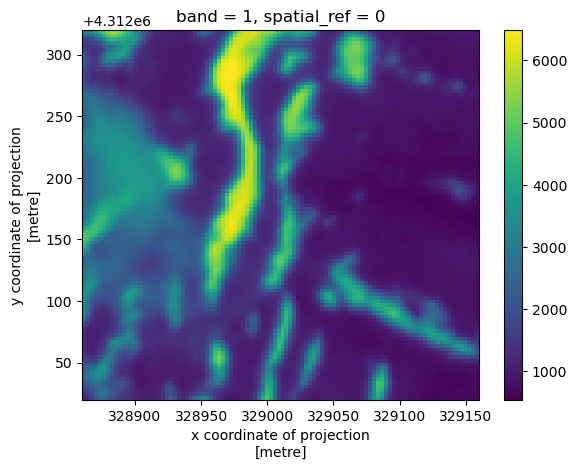

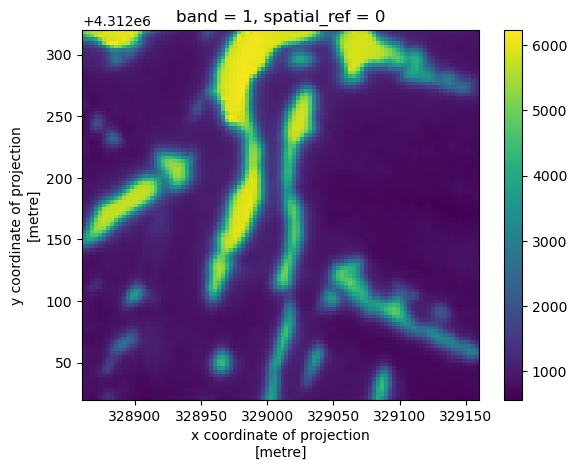

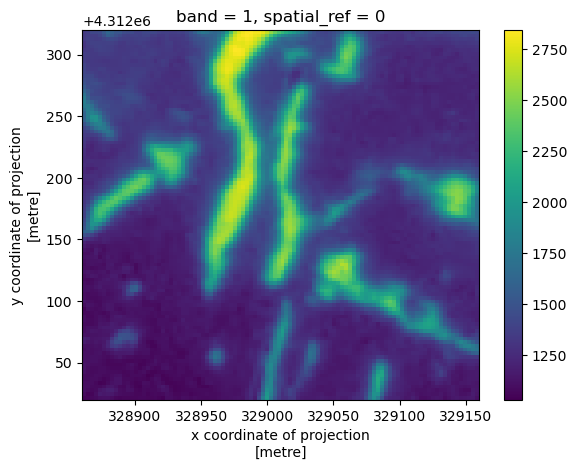

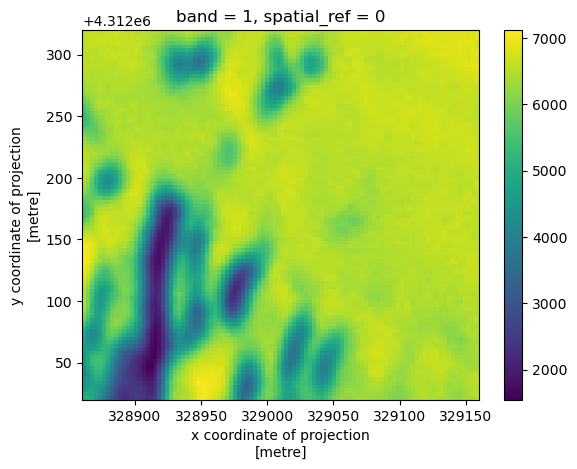

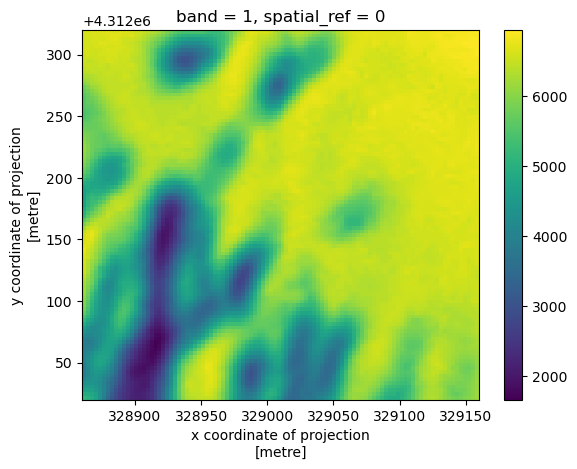

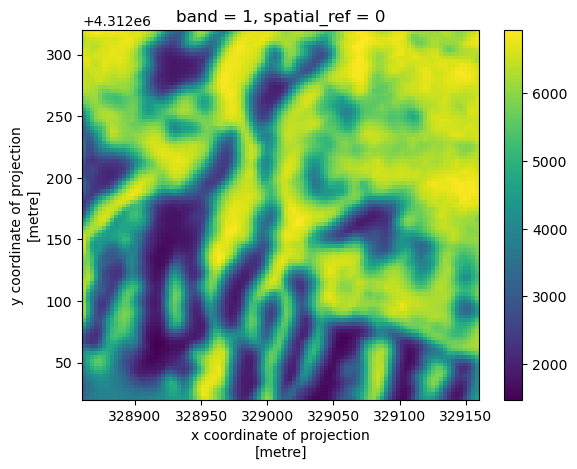

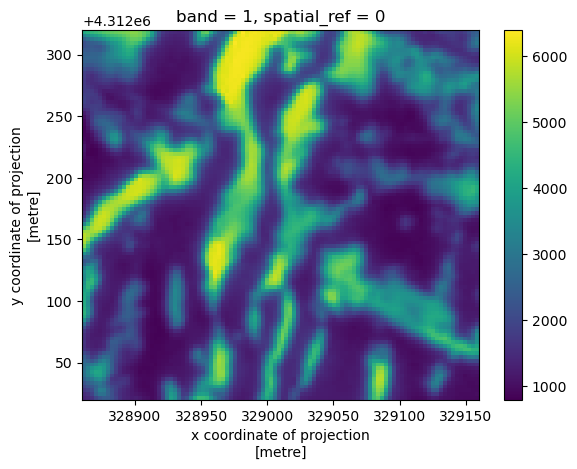

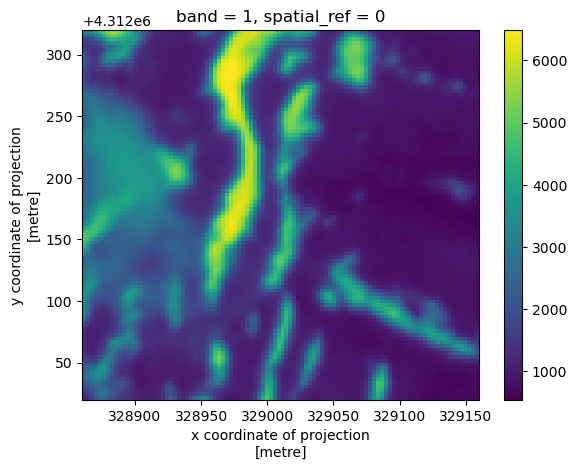

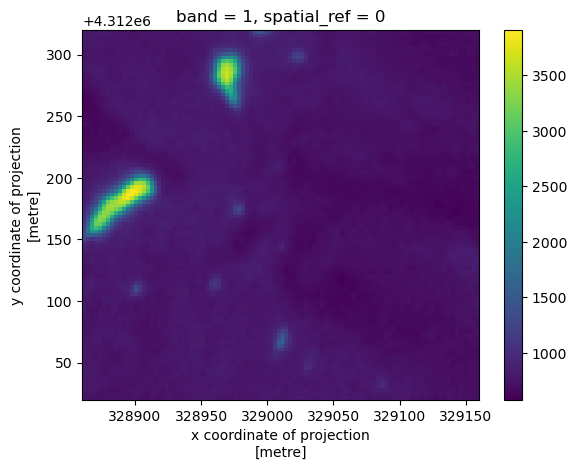

In [4]:
for fn in ps_image_filepaths:
    img = rix.open_rasterio(fn)
    clipped = img.rio.clip(bounding_box.geometry)
    clipped.sel(band=1).plot()
    plt.show()
    clipped.rio.to_raster(os.path.join('./clipped', os.path.basename(fn)))

# Classify clipped images

In [5]:
import planetsca as ps

/Users/elischwat/miniforge3/envs/planetenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
ls clipped

In [ ]:
imgs_to_classify = [
    "./clipped/2020-05-02_strip_3365031_composite_file_format.tif",
    "./clipped/2021-04-29_strip_4427235_composite_file_format.tif",
    "./clipped/2022-05-06_strip_5620141_composite_file_format.tif",
    "./clipped/2023-05-09_strip_6495899_composite_file_format.tif",
    "./clipped/2023-05-10_strip_6497912_composite_file_format.tif",
    "./clipped/2023-05-13_strip_6505736_composite_file_format.tif",
    "./clipped/2023-05-15_strip_6510381_composite_file_format.tif",
    "./clipped/2023-05-16_strip_6512704_composite_file_format.tif",
    "./clipped/2023-05-23_strip_6528815_composite_file_format.tif",
    "./clipped/2024-05-02_strip_7279988_composite_file_format.tif",
    "./clipped/2025-04-25_strip_8025643_composite_file_format.tif",
]

In [ ]:
# retrieve the pre-trained ONNX planetsca model from Hugging Face
model = ps.download.retrieve_model_onnx()

In [ ]:
# where we want to save the resulting SCA geotif images created from the Planet images
output_dirpath = "./SCA/"

In [ ]:
# run the model to predict SCA
sca_image_paths = ps.predict.predict_sca_onnx(
    planet_path=imgs_to_classify,
    model=model,
    output_dirpath=output_dirpath,
)